# EDA v2 - Raw Data (`data/raw`)

This notebook loads `DatiumTrain.rpt` and `DatiumTest.rpt` from `data/raw/` and runs a stronger exploratory analysis workflow.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)


In [2]:
def find_project_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / 'data' / 'raw').exists():
            return p
    raise FileNotFoundError('Could not find project root containing data/raw')

PROJECT_ROOT = find_project_root(Path.cwd())
RAW_DIR = PROJECT_ROOT / 'data' / 'raw'
TRAIN_PATH = RAW_DIR / 'DatiumTrain.rpt'
TEST_PATH = RAW_DIR / 'DatiumTest.rpt'

print('PROJECT_ROOT:', PROJECT_ROOT)
print('TRAIN_PATH:', TRAIN_PATH)
print('TEST_PATH:', TEST_PATH)


PROJECT_ROOT: /home/localhost/datium_model
TRAIN_PATH: /home/localhost/datium_model/data/raw/DatiumTrain.rpt
TEST_PATH: /home/localhost/datium_model/data/raw/DatiumTest.rpt


In [3]:
train_df = pd.read_csv(TRAIN_PATH, sep='\t', encoding='utf-8-sig', low_memory=False)
test_df = pd.read_csv(TEST_PATH, sep='\t', encoding='utf-8-sig', low_memory=False)

train_df['dataset_split'] = 'train'
test_df['dataset_split'] = 'test'

df = pd.concat([train_df, test_df], ignore_index=True)
print('train shape:', train_df.shape)
print('test shape :', test_df.shape)
print('full shape :', df.shape)

# Dont use these columns
cols_to_drop = [
    'AvgWholesale', 'AvgRetail', 'GoodWholesale', 'GoodRetail',
    'TradeMin', 'TradeMax', 'PrivateMax'
]

df = df.drop(columns=cols_to_drop)

train shape: (50704, 131)
test shape : (11488, 131)
full shape : (62192, 131)


## 1) Structure and data quality


In [4]:
display(df.head(3))
print('Columns:', len(df.columns))
display(df.dtypes.astype(str).value_counts().rename('count').to_frame())

duplicate_rows = int(df.duplicated().sum())
print('Duplicate rows:', duplicate_rows)

missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
display(missing_pct.head(20).rename('missing_pct').to_frame())

# print('Columns with missing_pct <= 5%:', int((missing_pct <= 5).sum()))
# lets consider only <=5% columns
possible_cols = missing_pct[missing_pct <= 5].index.tolist()
print('Columns with missing_pct <= 5%:', len(possible_cols))
print(possible_cols)

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,...,NewPrice,Colour,Branch,SaleCategory,Sold_Date,Compliance_Date,Age_Comp_Months,KM,Sold_Amount,dataset_split
0,Holden,Commodore,HOLD,COMMODO,2008,0,0,VE Omega Sedan 4dr. Auto 4sp 3.6i,F,L,...,34790.0,White,Perth (WA),Auction,2015-11-03 00:00:00.000,02/2008,93.0,227878.0,2000.0,train
1,Holden,Commodore,HOLD,COMMODO,1993,7,41,VR Executive Wagon 5dr. Auto 4sp 3.8i,F,L,...,27978.0,Red,Belmore (NSW),Auction,2000-10-18 00:00:00.000,08/1993,86.0,153091.0,6800.0,train
2,Toyota,RAV4,TOYO,RAV4,2012,0,6,ACA33R MY12 CV Wagon 5dr Man 5sp 4x4 2.4i,F,L,...,31990.0,040 - Glacier White (T),Sunshine (VIC),Dealer Only Auction,2014-02-05 00:00:00.000,10/2012,16.0,27374.0,22900.0,train


Columns: 124


,count
object,61
float64,57
int64,6


Duplicate rows: 0


,missing_pct
QuickChargeMins,100.000000
QuickChargeVoltage,100.000000
AltEngTorqueFrom,100.000000
NormalChargeMins,99.996784
NormalChargeVoltage,99.996784
AltEngAmpHours,99.990352
TopSpeedElectricEng,99.985529
KMRangeElectricEng,99.982313
ElectricEngineLocation,99.919604
AltEngPowerFrom,99.745948


Columns with missing_pct <= 5%: 68
['WarrantyKM', 'KerbWeight', 'WarrantyYears', 'EngineConfigurationDescription', 'EngineNum', 'Series', 'FrontTyreSize', 'RearTyreSize', 'FuelCapacity', 'FrontRimDesc', 'RearRimDesc', 'Height', 'Length', 'Width', 'VIN', 'ValvesCylinder', 'VFactsSegment', 'VFactsClass', 'TorqueRPMTo', 'Torque', 'CamDescription', 'WheelBase', 'PowerRPMTo', 'Power', 'Colour', 'Age_Comp_Months', 'Compliance_Date', 'SeatCapacity', 'MethodOfDeliveryDescription', 'GoodKM', 'AverageKM', 'EngineLocation', 'GearNum', 'KM', 'GearLocationDescription', 'Sold_Amount', 'NewPrice', 'BuildCountryOriginDescription', 'EngineCycleDescription', 'IsPPlateApproved', 'Sold_Date', 'SaleCategory', 'Branch', 'FamilyCode', 'FuelTypeDescription', 'Cylinders', 'FuelDeliveryDescription', 'EngineTypeDescription', 'InductionDescription', 'OptionCategory', 'YearGroup', 'Make', 'LimitedEdition', 'ImportFlag', 'CurrentRelease', 'Description', 'MonthGroup', 'SequenceNum', 'EngineSize', 'EngineDescription'

In [5]:
# Filter
df = df[possible_cols]

## 2) Target sanity checks


In [6]:
for col in ['NewPrice', 'Sold_Amount', 'Age_Comp_Months', 'KM']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

display(df[['NewPrice', 'Sold_Amount', 'Age_Comp_Months', 'KM']].describe())
print('Sold_Amount == 0:', int((df['Sold_Amount'] == 0).sum()))
print('NewPrice <= 0   :', int((df['NewPrice'] <= 0).sum()))
print('Sold_Amount > NewPrice:', int((df['Sold_Amount'] > df['NewPrice']).sum()))


,NewPrice,Sold_Amount,Age_Comp_Months,KM
count,62190.000000,62188.000000,62131.000000,6.218700e+04
mean,37064.130535,16723.225357,46.320468,8.483509e+04
std,15638.883783,10541.480928,34.173556,7.074110e+04
min,2478.000000,0.000000,0.000000,0.000000e+00
25%,29500.000000,10600.000000,26.000000,4.080550e+04
50%,35090.000000,15151.500000,39.000000,6.900600e+04
75%,41770.000000,20800.000000,56.000000,1.164285e+05
max,525000.000000,317000.000000,1413.000000,8.883234e+06


Sold_Amount == 0: 734
NewPrice <= 0   : 0
Sold_Amount > NewPrice: 44


In [7]:
df[df['Sold_Amount'] == 0]

,WarrantyKM,KerbWeight,WarrantyYears,EngineConfigurationDescription,EngineNum,Series,FrontTyreSize,RearTyreSize,FuelCapacity,FrontRimDesc,...,EngineSize,EngineDescription,Model,BodyStyleDescription,DriveCode,DriveDescription,GearTypeDescription,DoorNum,MakeCode,dataset_split
46,100000.0,1690.0,3.0,V60,??**### #######,VE,225/60 R16,225/60 R16,73.0,16x7.0,...,3565,3.6,Commodore,Sedan,RWD,Rear Wheel Drive,Automatic,4,HOLD,train
184,100000.0,1505.0,3.0,In-line,2AZ-A######,ACV40R,215/60 R16,215/60 R16,70.0,16x6.5,...,2362,2.4,Camry,Sedan,FWD,Front Wheel Drive,Automatic,4,TOYO,train
255,100000.0,1500.0,3.0,In-line,2AZ-A######,ACV40R,215/60 R16,215/60 R16,70.0,16x6.5,...,2362,2.4,Camry,Sedan,FWD,Front Wheel Drive,Automatic,4,TOYO,train
257,100000.0,1500.0,3.0,In-line,2AZ-A######,ACV40R,215/60 R16,215/60 R16,70.0,16x6.5,...,2362,2.4,Camry,Sedan,FWD,Front Wheel Drive,Automatic,4,TOYO,train
377,100000.0,1736.0,3.0,In-line,JGSW5C#####,BF Mk II,215/60 R16,215/60 R16,116.0,16x6.5,...,3984,4.0,Falcon,Wagon,RWD,Rear Wheel Drive,Sports Automatic,5,FORD,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50568,100000.0,1500.0,3.0,In-line,2AZ-A######,ACV40R,215/60 R16,215/60 R16,70.0,16x6.5,...,2362,2.4,Camry,Sedan,FWD,Front Wheel Drive,Automatic,4,TOYO,train
50607,100000.0,1500.0,3.0,In-line,2AZ-A######,ACV40R,215/60 R16,215/60 R16,70.0,16x6.5,...,2362,2.4,Camry,Sedan,FWD,Front Wheel Drive,Automatic,4,TOYO,train
50620,100000.0,1735.0,3.0,V60,H7A04 ######,VE,245/45 R18,245/45 R18,73.0,18x8.0,...,3565,3.6,Commodore,Sedan,RWD,Rear Wheel Drive,Sports Automatic,4,HOLD,train
50631,100000.0,1640.0,3.0,V60,HBA06 #######,VZ,205/65 R15,205/65 R15,75.0,15x6.0,...,3565,3.6,Commodore,Wagon,RWD,Rear Wheel Drive,Automatic,5,HOLD,train


In [8]:
df[df['Sold_Amount'] > df['NewPrice']].head()

,WarrantyKM,KerbWeight,WarrantyYears,EngineConfigurationDescription,EngineNum,Series,FrontTyreSize,RearTyreSize,FuelCapacity,FrontRimDesc,...,EngineSize,EngineDescription,Model,BodyStyleDescription,DriveCode,DriveDescription,GearTypeDescription,DoorNum,MakeCode,dataset_split
6040,NaN,1345.0,3.0,Horizontal,123456,79V,205/70 R15,205/70 R15,60.0,15x6.0,...,1994,2.0,Forester,Wagon,4XD,4X4 Dual Range,Manual,5,SUBA,train
12961,-1.0,1395.0,3.0,Horizontal,B######,G3,205/50 R17,205/50 R17,60.0,17x7.0,...,2457,2.5,Impreza,Hatchback,4WD,Four Wheel Drive,Manual,5,SUBA,train
13288,NaN,NaN,NaN,NaN,NaN,XB,NaN,NaN,NaN,NaN,...,4089,250,Falcon,Sedan,RWD,Rear Wheel Drive,Automatic,4,FORD,train
13533,100000.0,2000.0,3.0,V60,1GR-#######,GSJ15R,265/70 R17,265/70 R17,72.0,17x7.5,...,3956,4.0,FJ Cruiser,Wagon,4XD,4X4 Dual Range,Automatic,5,TOYO,train
13959,100000.0,1398.0,3.0,In-line,3RZ-#######,RZN149R,205 R16 C 6PR,205 R16 C 6PR,66.0,14x5.5,...,2694,2.7,Hilux,Utility,RWD,Rear Wheel Drive,Manual,4,TOYO,train


In [9]:
# Lets filter these out for the model
df = df[~(df['Sold_Amount'] == 0)]
df = df[~(df['Sold_Amount'] > df['NewPrice'])]

Two anomalies:


734 Vehicles sold at $0, perhaps because:
- data quality/data entry issues
- non standard transaction? could be writeoff, bulk/wholesale purchase adjusted

44 vehicles with Sold_Amount > NewPrice, could have happen due to
- data quality/data entry issues
- non-comparable pricing: NewPrice may exclude options/accessories, while Sold_Amount reflects the full equipped vehicle.
- market effects: rare/high-demand vehicles can appreciate temporarily.

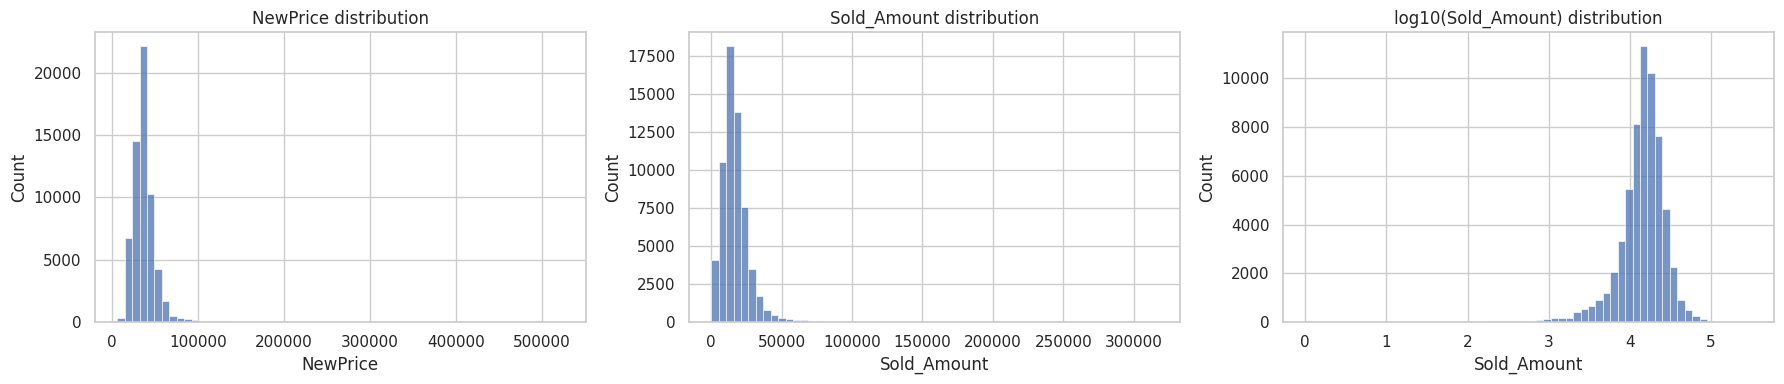

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(df['NewPrice'], bins=60, ax=axes[0])
axes[0].set_title('NewPrice distribution')
sns.histplot(df['Sold_Amount'], bins=60, ax=axes[1])
axes[1].set_title('Sold_Amount distribution')
sns.histplot(np.log10(df['Sold_Amount'].clip(lower=0)), bins=60, ax=axes[2])
axes[2].set_title('log10(Sold_Amount) distribution')
plt.tight_layout()


both NewPrice and Sold_Amouint positively skewed (right-skewed), strong tail

## 3) Correlations (numeric only)


,corr_with_Sold_Amount
Sold_Amount,1.000000
NewPrice,0.656664
KerbWeight,0.487138
Torque,0.371914
FuelCapacity,0.352359
Height,0.308659
Power,0.257163
YearGroup,0.255854
Width,0.253513
EngineSize,0.201337


,corr_with_Sold_Amount
SeatCapacity,0.182022
GearNum,0.181872
WheelBase,0.175280
Cylinders,0.162261
DoorNum,0.075696
ValvesCylinder,0.066040
SequenceNum,0.044787
MonthGroup,0.009341
WarrantyYears,0.003940
TorqueRPMTo,-0.028128


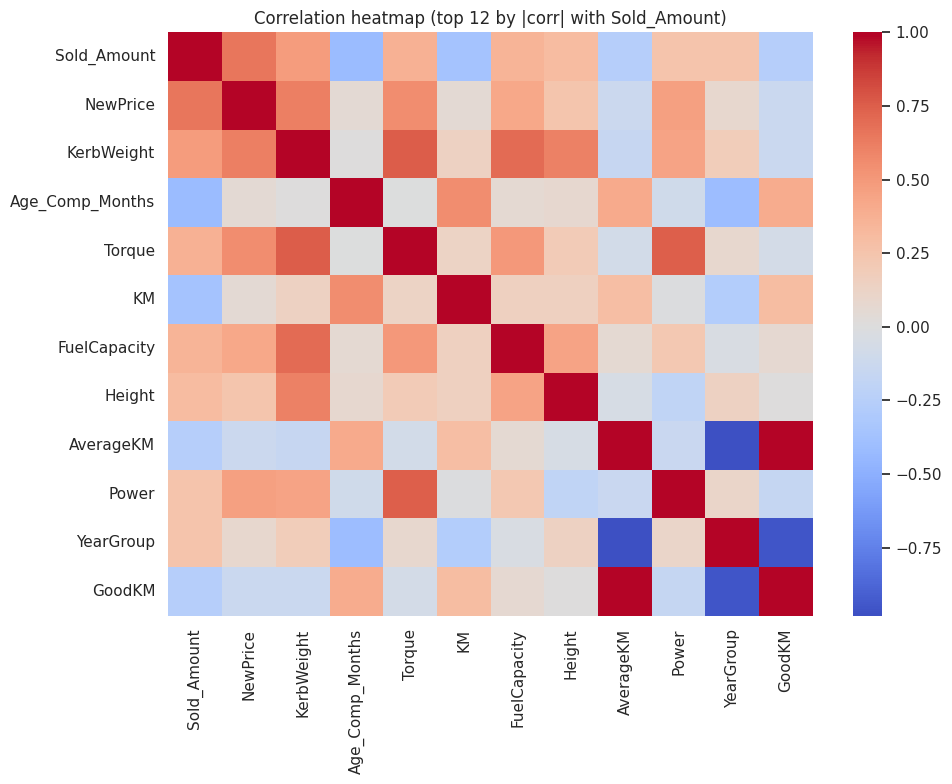

In [11]:
num_df = df.select_dtypes(include=[np.number]).copy()
corr = num_df.corr(numeric_only=True)
target_corr = corr['Sold_Amount'].dropna().sort_values(ascending=False)
display(target_corr.head(16).rename('corr_with_Sold_Amount').to_frame())
display(target_corr.tail(16).rename('corr_with_Sold_Amount').to_frame())

top_cols = target_corr.abs().sort_values(ascending=False).head(12).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(num_df[top_cols].corr(), cmap='coolwarm', center=0)
plt.title('Correlation heatmap (top 12 by |corr| with Sold_Amount)')
plt.tight_layout()


## 4) Depreciation trends


In [12]:
# 95% interval bounds (2.5th and 97.5th percentiles)
lower_95 = df['Age_Comp_Months'].quantile(0.025)
upper_95 = df['Age_Comp_Months'].quantile(0.975)

print(f"Lower 95% bound: {lower_95:.2f}")
print(f"Upper 95% bound: {upper_95:.2f}")


Lower 95% bound: 10.00
Upper 95% bound: 134.00


In [13]:
# lets say we consider only Age_Comp_Months threshold that covers 99.9% of rows, not too far too old sales may be unrealiable
age_99 = df['Age_Comp_Months'].quantile(0.999)

rows_covered = (df['Age_Comp_Months'] <= age_99).sum()
total_rows = len(df)
pct_covered = rows_covered / total_rows * 100

print(f"99th percentile Age_Comp_Months: {age_99:.2f}")
print(f"Rows with Age_Comp_Months <= {age_99:.2f}: {rows_covered:,} / {total_rows:,}")
print(f"Coverage: {pct_covered:.2f}%")
# we could consider up to ~20.5 years (246 months) 

99th percentile Age_Comp_Months: 245.00
Rows with Age_Comp_Months <= 245.00: 61,292 / 61,414
Coverage: 99.80%


In [14]:
work = df[(df['Age_Comp_Months'] >= 0) & (df['Age_Comp_Months'] <= 246) & (df['NewPrice'] >= 0)].copy()
work['DeltaPricePct'] = (work['Sold_Amount'] - work['NewPrice']) / work['NewPrice'] * 100
work['DeltaPriceAbs'] = work['Sold_Amount'] - work['NewPrice']

age_stats = work.groupby('Age_Comp_Months', as_index=False).agg(
    n=('Sold_Amount', 'size'),
    mean_delta_pct=('DeltaPricePct', 'mean'),
    median_delta_pct=('DeltaPricePct', 'median')
)
display(age_stats.head())


,Age_Comp_Months,n,mean_delta_pct,median_delta_pct
0,0.0,4,-40.804765,-42.677519
1,1.0,11,-29.239770,-17.854554
2,2.0,12,-20.503555,-18.490146
3,3.0,28,-20.514788,-16.646723
4,4.0,54,-24.908417,-25.255496


Target 10 -> nearest 10, mean=-27.58, median=-28.19, n=469
Target 133 -> nearest 133, mean=-86.35, median=-89.39, n=57


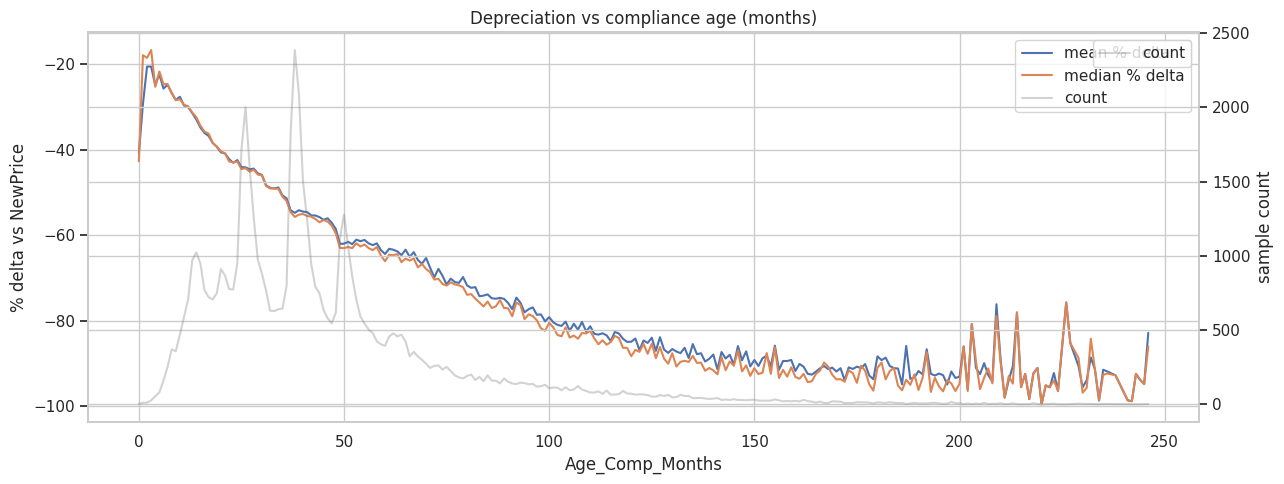

In [15]:
fig, ax1 = plt.subplots(figsize=(13, 5))
sns.lineplot(data=age_stats, x='Age_Comp_Months', y='mean_delta_pct', label='mean % delta', ax=ax1)
sns.lineplot(data=age_stats, x='Age_Comp_Months', y='median_delta_pct', label='median % delta', ax=ax1)
ax1.set_title('Depreciation vs compliance age (months)')
ax1.set_ylabel('% delta vs NewPrice')

ax2 = ax1.twinx()
sns.lineplot(data=age_stats, x='Age_Comp_Months', y='n', color='gray', alpha=0.35, label='count', ax=ax2)
ax2.set_ylabel('sample count')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')
plt.tight_layout()

for x in [10, 133]:
    i = (age_stats['Age_Comp_Months'] - x).abs().idxmin()
    row = age_stats.loc[i, ['Age_Comp_Months', 'mean_delta_pct', 'median_delta_pct', 'n']]
    print(f"Target {x} -> nearest {int(row['Age_Comp_Months'])}, mean={row['mean_delta_pct']:.2f}, median={row['median_delta_pct']:.2f}, n={int(row['n'])}")

- 95% of sales happen within: 10 to 133 months, so generally cars are resold with approx -27% to -88% of original value
- as age progresses, curves flatten, so additional age hurts less (in % terms).
- selling post 100 months past compliance (~8 years) rougly translates to 80% loss of value

## 5) Make-level comparison (top-volume makes)

we might not want to consider every single maker trends, but just top makers by volume.
smaller volume makers might have significantly different trends due to their luxury, resale value etc which might skew the general behavior of the model

In [16]:
top_makes = work['Make'].value_counts().head(11).index

total_rows = len(work)
perc95_rows = work['Make'].isin(top_makes).sum()
perc95_perc = perc95_rows / total_rows * 100

print(f"95% volume makes rows: {perc95_rows:,} / {total_rows:,}")
print(f"95% volume makes occupy: {perc95_perc:.2f}% of dataset")

# lets just consider top 11 makers by volume to generalize 95% confidence interval

95% volume makes rows: 58,340 / 61,295
95% volume makes occupy: 95.18% of dataset


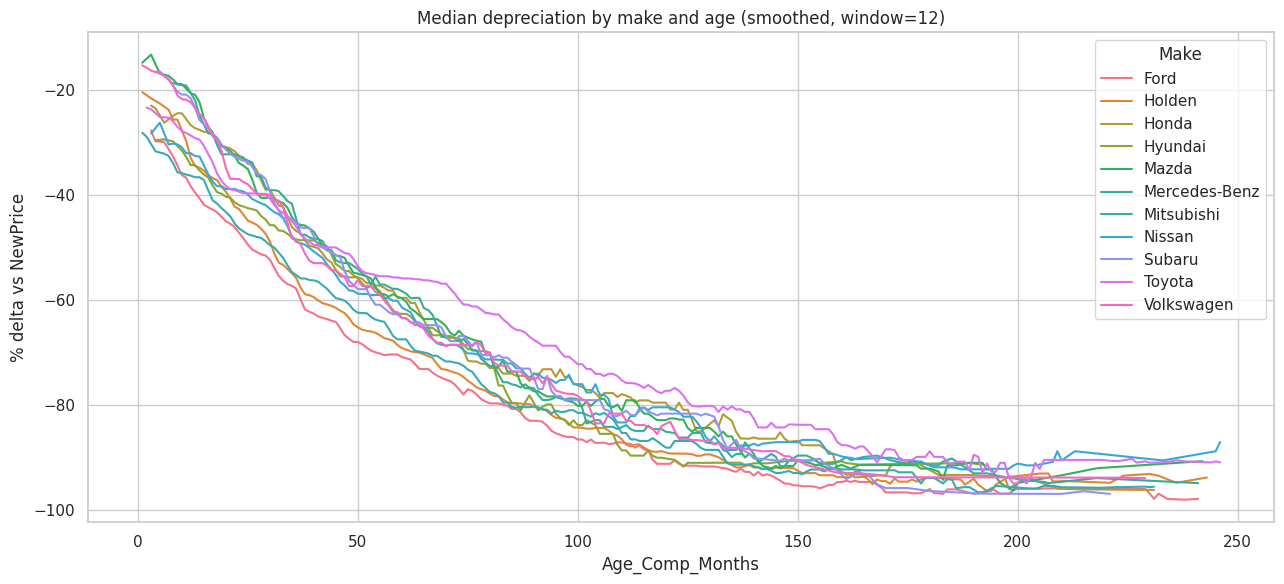

In [17]:
# lets just consider top n makers by volume that make up 95% of volume first
top_makes = work['Make'].value_counts().head(11).index

make_curve = (
    work[work['Make'].isin(top_makes)]
    .groupby(['Age_Comp_Months', 'Make'], as_index=False)['DeltaPricePct']
    .median()
    .sort_values(['Make', 'Age_Comp_Months'])
)

# Smooth each make with rolling median (window in months)
window = 12
make_curve['DeltaPricePct_smooth'] = (
    make_curve
    .groupby('Make')['DeltaPricePct']
    .transform(lambda s: s.rolling(window=window, min_periods=3, center=True).median())
)

plt.figure(figsize=(13, 6))
sns.lineplot(
    data=make_curve,
    x='Age_Comp_Months',
    y='DeltaPricePct_smooth',
    hue='Make'
)
plt.title(f'Median depreciation by make and age (smoothed, window={window})')
plt.ylabel('% delta vs NewPrice')
plt.tight_layout()


- Toyotas holds value the best, especially around ~60–170 months
- Ford and Holden depreciate much faster, sit lower than peers through much of 40–180 months.
- Around ~180+ months, many makers converge near -90% to -97% of selling price
